This Code is Using K-Nearest Neighbour For Prediction

Import the related modules

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

Data Loading and Preprocessing

In [205]:
def data_loading():
    # Load the dataset
    dataset = pd.read_csv('Dataset_spine_clean.csv')

    return dataset

def extracting_features(dataset, x, y):
    # Extract features
    features = dataset.iloc[x:y, 1:13].values

    return features

def extracting_labels(dataset, x, y):
    # Extract labels
    labels = dataset.iloc[x:y, 14].values

    return labels

def data_preprocessing(features, labels):
    # Split the features and labels into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

Develop the KNN model

In [206]:
def model(k = 5):
    # Define the knn model
    knn = KNeighborsClassifier(k)

    return knn

Training and Testing the Model.

In [207]:
def training(knn, X_train, y_train):
    # Feed the data into the model to train
    knn.fit(X_train, y_train)

def testing(knn, X_test):
    # Using the test data to test the model
    y_pred = knn.predict(X_test)
    # Probability for the positive class (e.g., 'Normal')
    y_proba = knn.predict_proba(X_test)[:, 1]

    return y_pred, y_proba

Evaluate the model with performance metrics

In [208]:
def evaluation(y_test, y_pred):
    # Using different evaluation metrics to score the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

def cofusion_matrix(y_test, y_pred):
    # Plot out the confusion matrix for the prediction
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Abnormal', 'Normal'])  # Update as needed
    disp.plot(cmap='Blues')

def roc_auc_result(y_test, y_proba):
    # Calculate the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

Main Function

In [209]:
def main():
    # Loading the dataset
    dataset = data_loading()

    # Extracting the features and labels for training and testing
    features = extracting_features(dataset, 13, 303)
    labels = extracting_labels(dataset, 13, 303)

    # Prepare the unknown data for evaluation
    unknown_features = np.vstack((extracting_features(dataset, 0, 13), extracting_features(dataset, -7, 310)))
    evaluation_labels = np.concatenate((extracting_labels(dataset, 0, 13), extracting_labels(dataset, -7, 310)))

    # Standardize features and unknown features consistently
    scale = StandardScaler()
    features = scale.fit_transform(features)
    unknown_features = scale.transform(unknown_features)

    # Do the data preprocessing step to get the splited data
    X_train, X_test, y_train, y_test = data_preprocessing(features, labels)

    # Tune hyperparameter k
    param_grid = {'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_k = grid_search.best_params_['n_neighbors']
    print(f"Best k: {best_k}")

    # Define the model with best k
    knn = model(best_k)

    # Train and Test the model
    training(knn, X_train, y_train)
    y_pred, y_proba = testing(knn, X_test)

    # Show out the result
    evaluation(y_test, y_pred)
    cofusion_matrix(y_test, y_pred)
    roc_auc_result(y_test, y_proba)

    # Perform Cross-validation
    print("Implementing Cross-Validation...")
    cv_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring= 'accuracy')

    # Print the cross-validation results
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.2f}")

    # Evaluate on unknown data
    print("Predicting the unknown data")
    prediction, probability = testing(knn, unknown_features)

    # Show out the result
    evaluation(evaluation_labels, prediction)
    cofusion_matrix(evaluation_labels, prediction)
    roc_auc_result(evaluation_labels, probability)

Running Code

Best k: 15
Accuracy: 0.7586
Precision: 0.7333
Recall: 0.7211
F1 Score: 0.7260
ROC AUC Score: 0.8493


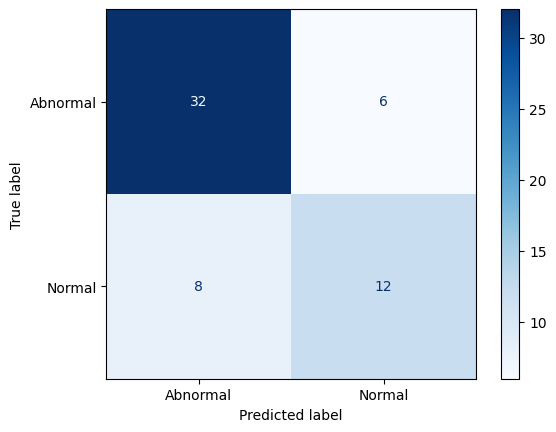

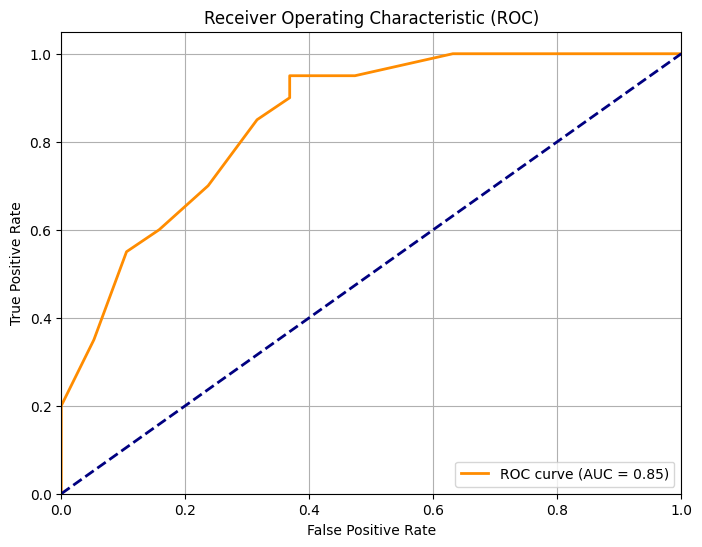

Implementing Cross-Validation...
Cross-validation scores: [0.54166667 0.83333333 0.7826087  0.91304348 0.82608696 0.91304348
 0.82608696 0.7826087  0.82608696 0.82608696]
Mean cross-validation accuracy: 0.81
Predicting the unknown data
Accuracy: 0.5500
Precision: 0.5833
Recall: 0.5879
F1 Score: 0.5489
ROC AUC Score: 0.6923


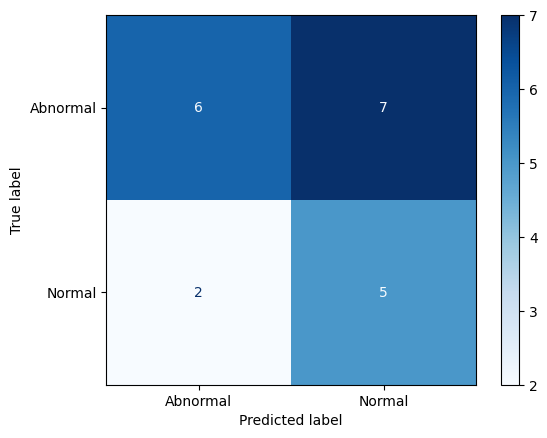

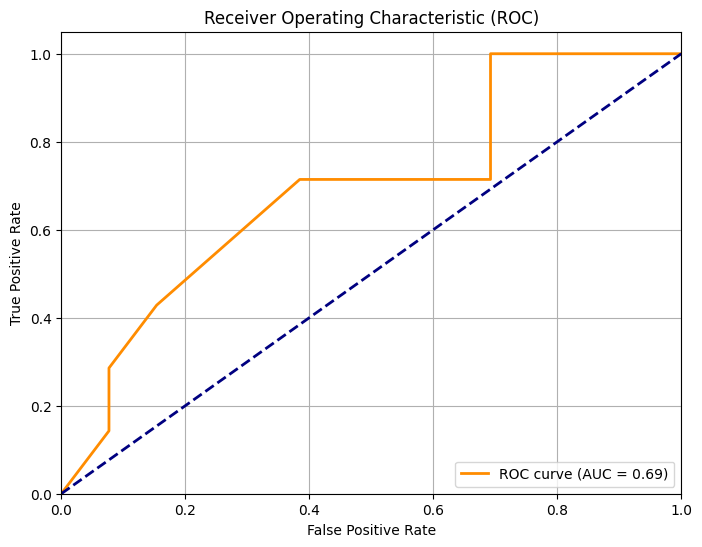

In [210]:
if __name__ == '__main__':
    main()